# Condicionales

**if - else**  
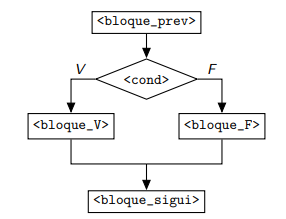

In [2]:
goles_colombia = 0
goles_ecuador = 0

if goles_colombia > goles_ecuador:
    print("Ganamos")
else:
    print("Perdimos")

Perdimos


In [8]:
def valor_absoluto(numero):
    
    if numero >= 0:
        valor = numero
    else:
        valor = numero*-1 # -numero
    
    return valor

x = float(input("Ingrese un número"))
print("El valor absoluto de {} es".format(x), valor_absoluto(x))

Ingrese un número-12931.2
El valor absoluto de -12931.2 es 12931.2


**enlazado (elif)**  
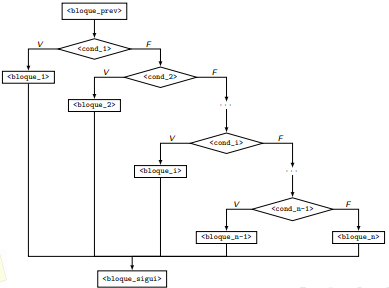

In [11]:
goles_colombia = 0
goles_ecuador = 1

if goles_colombia > goles_ecuador:
    as
    asdf
    asdf
    asdf
    asdfas
    dfasdf
elif goles_colombia == goles_ecuador:
    print("Empatamos")
else:
    print("Perdimos")

Perdimos


Una tienda tiene las siguientes promociones

>Si un cliente lleva más de 5 productos del mismo tipo le realizan un descuento del 5%. Si lleva más de 10 productos del
mismo tipo le realizan un descuento del 10%. Si lleva más de 20
productos del mismo tipo le realizan un descuento del 20%.
Construya un programa que dado el número de productos y el
precio de cada producto determine el valor a pagar por el cliente.


In [ ]:
def ________(__, ___):
    
    return ______

## Estructuras cíclicas


**while (mientras)** 

Se ejecuta mientras la expresión booleana se cumpla (True). 

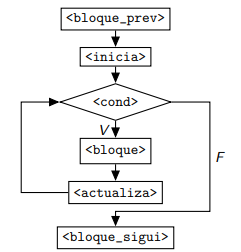

In [18]:
i = 0
while i < 7:
    i += 1 # i = i + 1
    print(i)

1
2
3
4
5
6
7


In [16]:
i = 2 # inicializar variable con 2
j = 25 # inicializar variable con 25
while i < j:
    print(i,j)
    i *= 2
    j += 10

print("Los valores en los que se dejó de cumplir la condición son", i, j)

2 25
4 35
8 45
16 55
32 65
64 75
Los valores en los que se dejó de cumplir la condición son 128 85


In [20]:
# Uso de banderas #

bandera = True # verde

while(bandera):
    print("Los carros pueden correr")
    carro_accidentado = input("¿Hubo algún accidente?")
        
    if carro_accidentado == "Sí":
        bandera = False # Rojo

Los carros pueden correr
¿Hubo algún accidente?Si
Los carros pueden correr
¿Hubo algún accidente?Sí


**for (para)**  
Para iterar sobre los elementos de una colección de elementos.

In [22]:
frutas = ["Tomate de árbol", "Maracuyá ", "Guayaba"]

for f in frutas:
    print(f)

Tomate de árbol
Maracuyá 
Guayaba


In [24]:
edades = [17, 16 , 20]

for edad in edades:
    print(edad+1)
    
    

18
17
21


In [36]:
# Range(C,F,Incremento / decremento)

for numero in range(30,20,-2):
    print(numero)


30
28
26
24
22


# MCO

In [37]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns 

In [39]:
datos= pd.read_csv(r"C:\Users\57317\Desktop\Universidad Nacional\Programación\Python\Curso Econometría básica con Python\Bases de Datos\GujaratiPorter71.txt", delimiter = "\t") 

In [40]:
datos.head()

,CM,FLR,PGNP,TFR
0,128,37,1870,6.66
1,204,22,130,6.15
2,202,16,310,7.00
3,197,65,570,6.25
4,96,76,2050,3.81


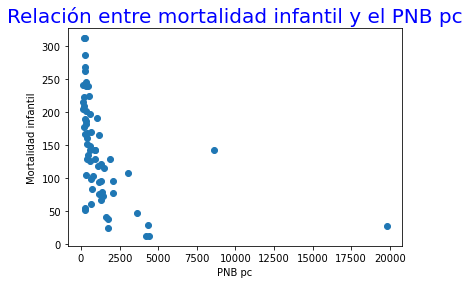

In [48]:
fig, ax = plt.subplots()
ax.scatter(datos["PGNP"],datos["CM"])
ax.set_ylabel("Mortalidad infantil")
ax.set_xlabel("PNB pc")
ax.set_title("Relación entre mortalidad infantil y el PNB pc", fontsize = 20, color = "blue")
plt.show()

In [50]:
modelo=sm.OLS(datos["CM"],datos["PGNP"]) # Primero va Y (variable explicada) y después va X (variable explicativa)
resultados = modelo.fit()
print(resultados.summary())

                                 OLS Regression Results                                
Dep. Variable:                     CM   R-squared (uncentered):                   0.056
Model:                            OLS   Adj. R-squared (uncentered):              0.041
Method:                 Least Squares   F-statistic:                              3.710
Date:                Thu, 14 Oct 2021   Prob (F-statistic):                      0.0586
Time:                        18:34:32   Log-Likelihood:                         -413.92
No. Observations:                  64   AIC:                                      829.8
Df Residuals:                      63   BIC:                                      832.0
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [51]:
modelo_con_intercepto=sm.OLS(datos["CM"],sm.add_constant(datos["PGNP"])) # agregamos intercepto
resultados = modelo_con_intercepto.fit()
print(resultados.summary())

                            OLS Regression Results                            
Dep. Variable:                     CM   R-squared:                       0.166
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     12.36
Date:                Thu, 14 Oct 2021   Prob (F-statistic):           0.000826
Time:                        18:37:41   Log-Likelihood:                -361.64
No. Observations:                  64   AIC:                             727.3
Df Residuals:                      62   BIC:                             731.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        157.4244      9.846     15.989      0.0

In [54]:
valores_estimados = resultados.predict()

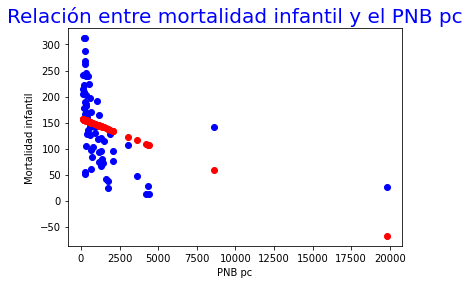

In [57]:
fig, ax = plt.subplots()
ax.scatter(datos["PGNP"],datos["CM"],color="blue")
ax.scatter(datos["PGNP"],valores_estimados,color="red")
ax.set_ylabel("Mortalidad infantil")
ax.set_xlabel("PNB pc")
ax.set_title("Relación entre mortalidad infantil y el PNB pc", fontsize = 20, color = "blue")
plt.show()

In [ ]:
datos["1/PGNP"] = __________

In [ ]:
modelo3= sm.____()

In [ ]:
valores_estimados2 = __________

In [ ]:
sns.________()

In [ ]:
Y = ____ 
X = ____ 

In [ ]:
modelo4 = ____

In [ ]:
print("Los coeficientes del modelo son:",_______) 